课程介绍

pandas 

基本操作

​	 数据运算

​	画图

​	文件读取

高级处理

​	缺失值处理

​	数据离散化

​	合并

​	交叉表透视表

​	分组聚合

案例

第三天汇总

# 5.4 DataFrame运算

## 1 算术运算

对象[]+1

对象[].add()

对象[]-1

对象[].sub()

## 2 逻辑运算

Bool索引

对象[对象[]>23 & 对象[]<24]



### 2.2 逻辑运算函数

- query(expr)
  - expr:查询字符串

对象.query(字符串)

isin([,])

## 3 统计运算

### 3.1 describe

描述

### 3.2 统计函数

mode 众数

idxmax  最大值索引  argmax 最大值下标

idxmin  最小值索引  argmin 最小值下标

axis 轴向

### 3.3 累计统计函数

cum+sum  累积前i 个和

## 4 自定义运算

对象.apply(func,axis = 0)

def func():

​	执行内容

​	return

对象.apply(lambda x:)

# 5.5 Pandas画图

## 1 pandas.DataFrame.plot

`DataFrame.plot`(*kind='line'*)

line  default   折线图

​	bar   柱状图

​	pie  饼图

​	hist  直方图

​	scatter  散点图

​    barh  ‘barh’ : horizontal bar plot

# 5.6 文件读取与存储

## 1 CSV

### 1.1 read_csv

pandas.read_csv(filepath_or_buffer, sep =',', usecols )

- filepath_or_buffer:文件路径
- sep :分隔符，默认用","隔开
- usecols:指定读取的列名，列表形式

### 1.2 to_csv

对象.to_csv(''路径 ,columns =[],header = False  ,index =, mode= "W")

- path_or_buf :文件路径
- sep :分隔符，默认用","隔开
- columns :选择需要的列索引
- header :boolean or list of string, default True,是否写进列索引值
- index:是否写进行索引
- mode:'w'：重写, 'a' 追加



## 2 HDF5

可以保存多表,通过key值读取

+ pd.read_hdf('路径',key=)
+ pd.to_hdf('路径',key= )

**注意：优先选择使用HDF5文件存储**

- HDF5在存储的时候支持压缩，**使用的方式是blosc，这个是速度最快**的也是pandas默认支持的
- 使用压缩可以**提磁盘利用率，节省空间**
- HDF5还是跨平台的，可以轻松迁移到hadoop 上面

## 3 JSON

+ read_json
+ to_json 

### 3.1 read_json

pandas.read_json(path_or_buf=None, orient=None, typ='frame', lines=False)

- 将JSON格式准换成默认的Pandas DataFrame格式

- orient : string,Indication of expected JSON string format.

  - 'split' : dict like {index -> [index], columns -> [columns], data -> [values]}

    - split 将索引总结到索引，列名到列名，数据到数据。将三部分都分开了

  - **'records' **: list like [{column -> value}, ... , {column -> value}]

    - records 以`columns：values`的形式输出

  - 'index' : dict like {index -> {column -> value}}

    - index 以`index：{columns：values}...`的形式输出

  - 'columns' : dict like {column -> {index -> value}}

    ,默认该格式

    - colums 以`columns:{index:values}`的形式输出

  - 'values' : just the values array

    - values 直接输出值

- lines : boolean, default False

  - 按照每行读取json对象

- typ : default ‘frame’， 指定转换成的对象类型series或者dataframe

### 3.3 to_json

DataFrame.to_json(*path_or_buf=None**orient=None**lines=False*

- 将Pandas 对象存储为json格式
- *path_or_buf=None*：文件地址
- orient:存储的json形式，{‘split’,’records’,’index’,’columns’,’values’}
- lines:一个对象存储为一行

# 5.7 高级处理-缺失值处理

1. 获取数据
2. 数据基本处理
   1. 缺失值
3. 特征工程
4. 建立模型
5. 模型评估

处理

	1. 删除
 	2. 补差

处理过程

	1. 

什么是缺失值

np.nan

## 1 如何处理nan

1. 判断是否有缺失值

   pd.isnull(对象)

   pd.notnull(对象)

   结合np.any   np.all 使用

2. 处理缺失值

   2.1 删除(数据多)

   ​	对象.dropna()

   2.2 补空(数据少)

      对象.fillna(mean,inplace= )

   ​	inplace 是否替代原值   默认False 

3. 如果缺失值是别的符合"?"

   1. 将缺失值替代成nan

      df.replace(to_replace=, value=)

      - to_replace:替换前的值
      - value:替换后的值

# 5.8 高级处理-数据离散化

## 2 什么是数据的离散化



1.   将连续数值 分成若干区间
2. **用不同的符号或整数** **值代表落在每个子区间中的属性值。**

## 1 为什么要离散化

1. 减少连续数值的个数
2. 算法需要

## 3 股票的涨跌幅离散化

1. pd.qcut(data,q)

   q   离散化成几份

   对象.value_counts()

2. **pd.cut(data,bins=)**

   bins 自定义组距

### 3.3 股票涨跌幅分组数据变成one-hot编码

别名: 热编码或者哑变量

将数据类别转成哑变量(00000100000)样式

1. 为什么one- hot  编码

   避免计算误解

   识别容易

2. 如何执行one-hot编码

   pd.get_dummies(data,prefix =)

   prefix  : 别名

# 5.9 高级处理-合并

1. concat 
2. merge

## 1 pd.concat实现数据合并

pd.concat([data1, data2],axis= )

轴

## 2 pd.merge

pd.merge(left ,right, how, on=)

how   

 left  

right 

inner

 outer

On  根据哪一个值

# 5.10 高级处理-交叉表与透视表

A     B   

**探究股票的涨跌与星期几有关**

A  : 星期几

B  股票涨跌

**交叉表:**

 统计B列根据A列进行统计(个数)

pd.crosstab(value1, value2)

**透视表:**

 统计B列根据A列进行统计(比例)

对象.pivot_table(B,index =A)

# 5.11 高级处理-分组与聚合

## 1 什么分组与聚合

注意:必须一起使用

统计星巴克根据国家统计店铺数

1. 根据国家分组
2. 计算count

## 2 分组API

对象.groupby(key,as_index=Falese)

as_index 是否将key作为索引

默认True



In [100]:
import pandas as pd
import numpy as np

In [101]:
data = pd.read_csv("./data/stock_day.csv")

In [103]:
# 算数运算
data['open'].add(1).head()

2018-02-27    24.53
2018-02-26    23.80
2018-02-23    23.88
2018-02-22    23.25
2018-02-14    22.49
Name: open, dtype: float64

In [ ]:
# 逻辑运算
# 例如筛选data["open"] > 23的日期数据

In [105]:
(data['open'] > 23).head()

2018-02-27     True
2018-02-26    False
2018-02-23    False
2018-02-22    False
2018-02-14    False
Name: open, dtype: bool

In [107]:
# 完成多个逻辑判断
data[(data['open'] >23) & (data['open'] <24)].head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-01,23.71,23.86,22.42,22.22,66414.64,-1.30,-5.48,23.646,24.365,24.279,52812.35,80394.43,88480.92,1.66
2018-01-31,23.85,23.98,23.72,23.31,49155.02,-0.11,-0.46,24.036,24.583,24.411,60348.94,80496.48,91666.75,1.23
2018-01-30,23.71,24.08,23.83,23.70,32420.43,0.05,0.21,24.350,24.671,24.365,77485.53,84805.23,92943.35,0.81
2018-01-16,23.40,24.60,24.40,23.30,101295.42,0.96,4.10,23.908,24.058,23.321,82003.73,101081.47,74590.92,2.54


In [ ]:
# 逻辑运算函数
# query(expr)
# expr:查询字符串

In [108]:
# 通过query使得刚才的过程更加方便
data.query("open<24 & open>23").head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-01,23.71,23.86,22.42,22.22,66414.64,-1.30,-5.48,23.646,24.365,24.279,52812.35,80394.43,88480.92,1.66
2018-01-31,23.85,23.98,23.72,23.31,49155.02,-0.11,-0.46,24.036,24.583,24.411,60348.94,80496.48,91666.75,1.23
2018-01-30,23.71,24.08,23.83,23.70,32420.43,0.05,0.21,24.350,24.671,24.365,77485.53,84805.23,92943.35,0.81
2018-01-16,23.40,24.60,24.40,23.30,101295.42,0.96,4.10,23.908,24.058,23.321,82003.73,101081.47,74590.92,2.54


# 统计运算

In [109]:
# 计算平均值，标准差，最大值，最小值
data.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,21.272706,21.900513,21.336267,20.771835,99905.519114,0.018802,0.190280,21.302362,21.267656,21.200946,100008.642691,100287.542177,100797.518398,2.936190
std,3.930973,4.077578,3.942806,3.791968,73879.119354,0.898476,4.079698,3.880640,3.813602,3.686186,62761.578326,56759.082060,50101.575639,2.079375
min,12.250000,12.670000,12.360000,12.200000,1158.120000,-3.520000,-10.030000,12.520000,12.520000,12.520000,10804.740000,19130.510000,23311.000000,0.040000
25%,19.000000,19.500000,19.045000,18.525000,48533.210000,-0.390000,-1.850000,18.990000,19.102000,19.275000,55794.985000,59861.955000,64103.675000,1.360000
50%,21.440000,21.970000,21.450000,20.980000,83175.930000,0.050000,0.260000,21.504000,21.623000,21.530000,86133.330000,89234.970000,96291.730000,2.500000
75%,23.400000,24.065000,23.415000,22.850000,127580.055000,0.455000,2.305000,23.318000,23.098500,23.136000,127655.655000,124693.255000,124001.015000,3.915000
max,34.990000,36.350000,35.210000,34.010000,501915.410000,3.030000,10.030000,33.696000,32.186000,29.998000,404443.540000,360028.160000,269280.790000,12.560000


### 统计函数

```
count	Number of non-NA observations
sum	Sum of values
mean	Mean of values
median	Arithmetic median of values
min	Minimum
max	Maximum
mode	Mode
abs	Absolute Value
prod	Product of values
std	Bessel-corrected sample standard deviation
var	Unbiased variance
idxmax	compute the index labels with the maximum
idxmin	compute the index labels with the minimum
```

In [111]:
# 使用统计函数，0代表列求结果，1代表行求统计结果
data.max(0)

open                34.990
high                36.350
close               35.210
low                 34.010
volume          501915.410
price_change         3.030
p_change            10.030
ma5                 33.696
ma10                32.186
ma20                29.998
v_ma5           404443.540
v_ma10          360028.160
v_ma20          269280.790
turnover            12.560
dtype: float64

In [112]:
# 标准差
data.std(0)

open                3.930973
high                4.077578
close               3.942806
low                 3.791968
volume          73879.119354
price_change        0.898476
p_change            4.079698
ma5                 3.880640
ma10                3.813602
ma20                3.686186
v_ma5           62761.578326
v_ma10          56759.082060
v_ma20          50101.575639
turnover            2.079375
dtype: float64

In [113]:
# 方差
data.var(0)

open            1.545255e+01
high            1.662665e+01
close           1.554572e+01
low             1.437902e+01
volume          5.458124e+09
price_change    8.072595e-01
p_change        1.664394e+01
ma5             1.505937e+01
ma10            1.454356e+01
ma20            1.358797e+01
v_ma5           3.939016e+09
v_ma10          3.221593e+09
v_ma20          2.510168e+09
turnover        4.323800e+00
dtype: float64

In [114]:
# median():中位数

df = pd.DataFrame({"COL1":[2,3,4,5,4,2],
                  'COL2':[0,1,2,3,4,2]})
df.median()

COL1    3.5
COL2    2.0
dtype: float64

In [138]:
data.idxmin()

open            2015-03-02
high            2015-03-02
close           2015-09-02
low             2015-03-02
volume          2016-07-06
price_change    2015-06-15
p_change        2015-09-01
ma5             2015-03-02
ma10            2015-03-02
ma20            2015-03-02
v_ma5           2017-02-03
v_ma10          2017-02-03
v_ma20          2017-05-23
turnover        2016-07-06
dtype: object

In [118]:
# 求出最大值的行索引
data.idxmax(axis=0)['open']

'2015-06-15'

In [119]:
# 求出最小值的行索引
data.idxmin(axis=0)['open']

'2015-03-02'

## 累计统计函数
```
函数	作用
cumsum	计算前1/2/3/…/n个数的和
cummax	计算前1/2/3/…/n个数的最大值
cummin	计算前1/2/3/…/n个数的最小值
cumprod	计算前1/2/3/…/n个数的积
```

In [131]:
data = data.sort_index

In [122]:
data

<bound method DataFrame.sort_index of              open   high  close    low     volume  price_change  p_change  \
2018-02-27  23.53  25.88  24.16  23.53   95578.03          0.63      2.68   
2018-02-26  22.80  23.78  23.53  22.80   60985.11          0.69      3.02   
2018-02-23  22.88  23.37  22.82  22.71   52914.01          0.54      2.42   
2018-02-22  22.25  22.76  22.28  22.02   36105.01          0.36      1.64   
2018-02-14  21.49  21.99  21.92  21.48   23331.04          0.44      2.05   
2018-02-13  21.40  21.90  21.48  21.31   30802.45          0.28      1.32   
2018-02-12  20.70  21.40  21.19  20.63   32445.39          0.82      4.03   
2018-02-09  21.20  21.46  20.36  20.19   54304.01         -1.50     -6.86   
2018-02-08  21.79  22.09  21.88  21.75   27068.16          0.09      0.41   
2018-02-07  22.69  23.11  21.80  21.29   53853.25         -0.50     -2.24   
2018-02-06  22.80  23.55  22.29  22.20   55555.00         -0.97     -4.17   
2018-02-05  22.45  23.39  23.27  22.25

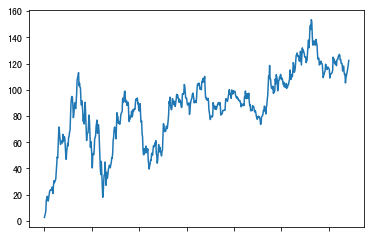

In [142]:
data = pd.read_csv("./data/stock_day.csv")
stock_rise = data['p_change']
stock_rise.sort_index().cumsum().plot()

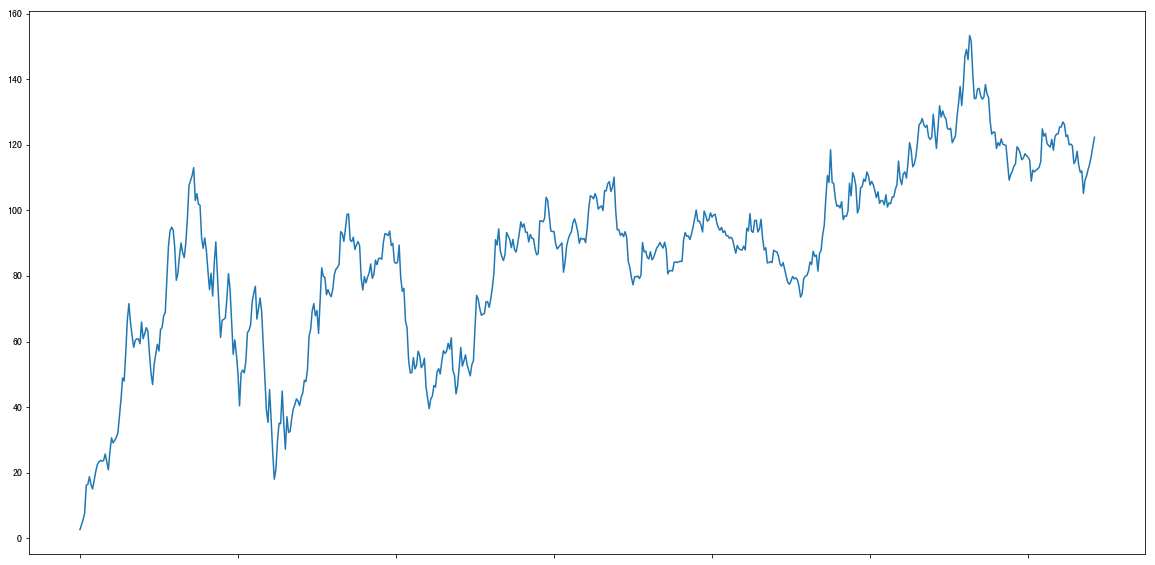

In [139]:
data['p_change'].sort_index().cumsum().plot(figsize = (20,10))

In [ ]:
# 自定义运算
# apply(func, axis=0)
# func:自定义函数
# axis=0:默认是列，axis=1为行进行运算
# 定义一个对列，最大值-最小值的函数

In [144]:
data[['open','close']].apply(lambda x:x.max()-x.min())

open     22.74
close    22.85
dtype: float64

In [26]:
# 综合分析，能够的出很多统计结果，count，mean，std,min,max
data["p_change"].describe()

count    643.000000
mean       0.190280
std        4.079698
min      -10.030000
25%       -1.850000
50%        0.260000
75%        2.305000
max       10.030000
Name: p_change, dtype: float64

## 统计函数
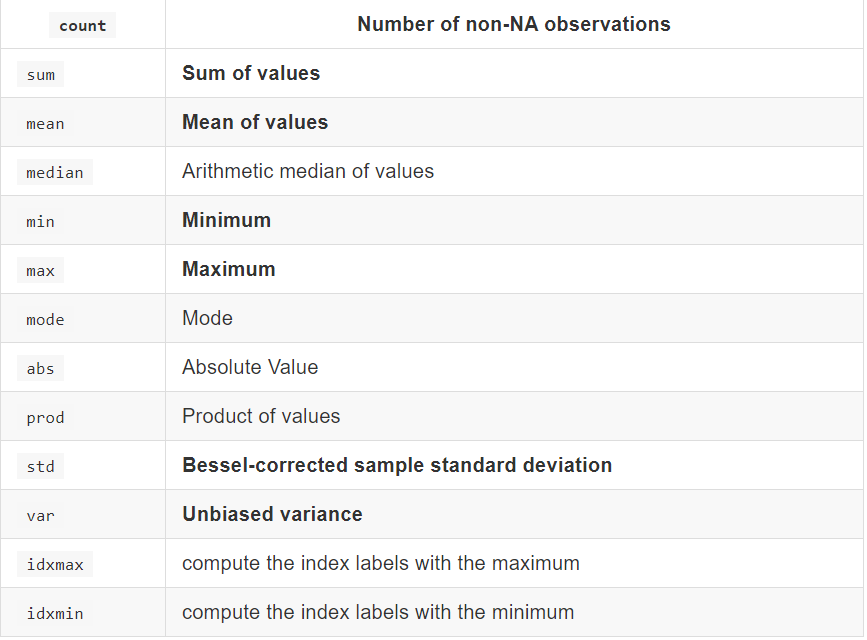

In [12]:
import pandas as pd
data = pd.read_csv("./data/stock_day.csv")

In [4]:
# 返回每一列的最大值
data.max()

open                34.990
high                36.350
close               35.210
low                 34.010
volume          501915.410
price_change         3.030
p_change            10.030
ma5                 33.696
ma10                32.186
ma20                29.998
v_ma5           404443.540
v_ma10          360028.160
v_ma20          269280.790
turnover            12.560
dtype: float64

In [5]:
# 中位数为将数据从小到大排列，在最中间的那个数为中位数。如果没有中间数，取中间两个数的平均值
data.median()

open               21.440
high               21.970
close              21.450
low                20.980
volume          83175.930
price_change        0.050
p_change            0.260
ma5                21.504
ma10               21.623
ma20               21.530
v_ma5           86133.330
v_ma10          89234.970
v_ma20          96291.730
turnover            2.500
dtype: float64

In [6]:
data.idxmax()

open            2015-06-15
high            2015-06-10
close           2015-06-12
low             2015-06-12
volume          2017-10-26
price_change    2015-06-09
p_change        2015-08-28
ma5             2015-06-15
ma10            2015-06-18
ma20            2015-06-18
v_ma5           2017-10-26
v_ma10          2017-11-02
v_ma20          2017-11-15
turnover        2017-10-26
dtype: object

In [8]:
# 累计统计函数
# 排序
data.sort_index().head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16


In [9]:
stock_rise = data['p_change']

In [11]:
stock_rise.cumsum().head()

2018-02-27     2.68
2018-02-26     5.70
2018-02-23     8.12
2018-02-22     9.76
2018-02-14    11.81
Name: p_change, dtype: float64

## pandas 绘图
```
1 pandas.DataFrame.plot
DataFrame.plot(kind='line')
kind : str，需要绘制图形的种类
‘line’ : line plot (default)
‘bar’ : vertical bar plot
‘barh’ : horizontal bar plot
关于“barh”的解释：
http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html
‘hist’ : histogram
‘pie’ : pie plot
‘scatter’ : scatter plot
更多细节：https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot

2 pandas.Series.plot
更多细节：https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html?highlight=plot#pandas.Series.plot
```

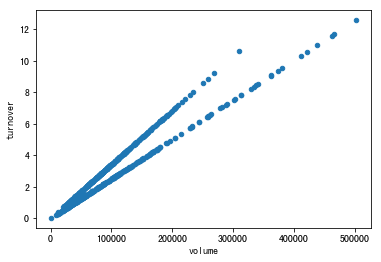

In [15]:
data.plot(kind='scatter',x='volume',y='turnover')

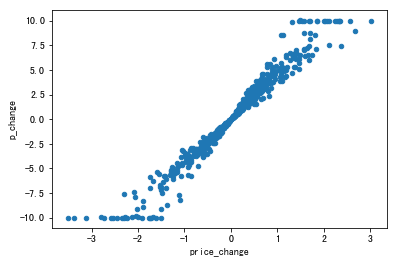

In [16]:
data.plot(kind='scatter',x='price_change',y='p_change')

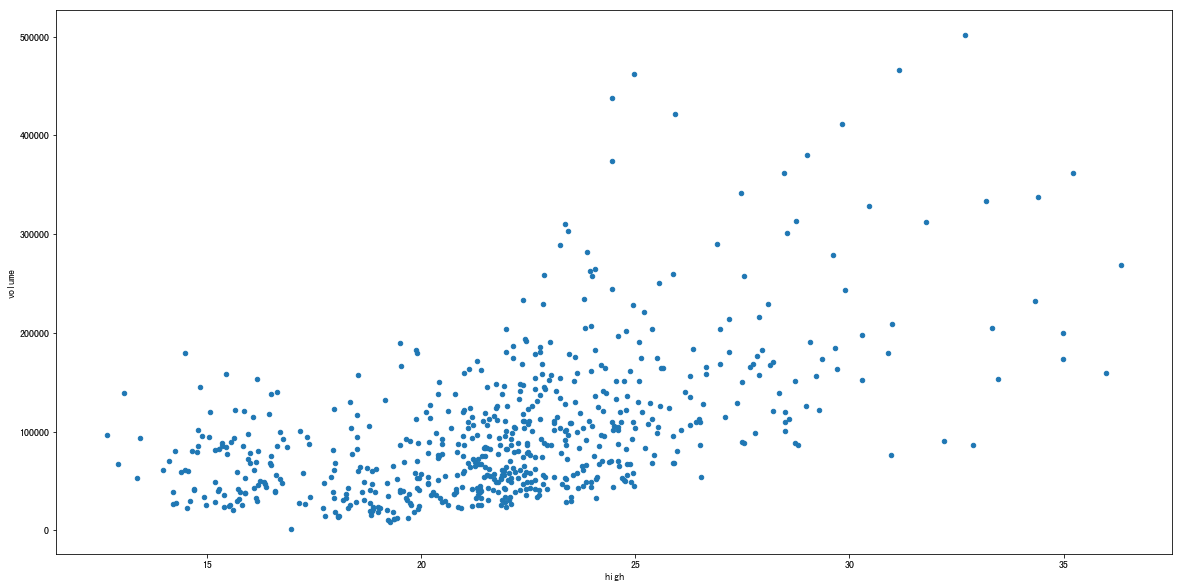

In [17]:
data.plot(kind='scatter',x='high',y='volume',figsize=(20,10))

In [18]:
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [20]:
# 读取文件HDF5
mydata1 = pd.read_hdf("./data/day_close.h5")

In [21]:
mydata1.head(5)

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,001965.SZ,603283.SH,002920.SZ,002921.SZ,300684.SZ,002922.SZ,300735.SZ,603329.SH,603655.SH,603080.SH
0,16.30,17.71,4.58,2.88,14.60,2.62,4.96,4.66,5.37,6.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.02,19.20,4.65,3.02,15.97,2.65,4.95,4.70,5.37,6.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.02,17.28,4.56,3.06,14.37,2.63,4.82,4.47,5.37,5.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.18,16.97,4.49,2.95,13.10,2.73,4.89,4.33,5.37,5.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.95,17.19,4.55,2.99,13.18,2.77,4.97,4.42,5.37,5.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
mydata1.to_hdf("./python28.h5",key='open')

In [24]:
myjson = pd.read_json("./data/Sarcasm_Headlines_Dataset.json",orient="records",lines=True)

In [25]:
# 读取
myjson.to_json("./python28.json",orient='records',lines=False)

# 缺失值处理

In [26]:
import pandas as pd
import numpy as np

In [27]:
type(np.nan)

float

In [41]:
movie = pd.read_csv('./data/IMDB-Movie-Data.csv')
print(movie.columns)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')


In [42]:
np.any(pd.isnull(movie))

True

In [36]:
# 缺失值处理
movie.shape

(1000, 12)

In [45]:
data = movie.dropna()

In [46]:
data.shape

(838, 12)

In [47]:
# 以平均值填充
movie['Revenue (Millions)'].fillna(movie['Revenue (Millions)'].mean(),inplace = True)

In [49]:
movie['Revenue (Millions)'].head(10)

0    333.130000
1    126.460000
2    138.120000
3    270.320000
4    325.020000
5     45.130000
6    151.060000
7     82.956376
8      8.010000
9    100.010000
Name: Revenue (Millions), dtype: float64

In [50]:
np.any(pd.isnull(movie))

True

In [51]:
for i in movie.columns:
    if np.any(pd.isnull(movie[i])):
        print(i)
        movie[i].fillna(movie[i].mean(),inplace = True)

Metascore


In [52]:
wis = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")

In [53]:
np.any(wis=="?")

True

In [54]:
wis.replace(to_replace="?",value=np.nan,inplace=True)

In [55]:
wis.shape

(698, 11)

In [57]:
data = wis.dropna()

In [58]:
data.shape

(682, 11)